In [13]:
from google.colab import drive
drive.mount('/content/drive')

# Path ke dataset di Google Drive
dataset_path = '/content/drive/MyDrive/Dataset/DatasetAirlines.csv'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Analisis Kepuasan Pelanggan Maskapai Menggunakan Model Pembelajaran Mesin

Identitas:
- Nama: Oky Satria Widhiansyah
- NIM: A11.2020.12674
- Universitas: Universitas Dian Nuswantoro
- Prodi:Teknik Informatika


Ringkasan:
Proyek ini bertujuan untuk menganalisis faktor-faktor yang memengaruhi kepuasan pelanggan maskapai dan memprediksi tingkat kepuasan menggunakan teknik pembelajaran mesin.
Kepuasan pelanggan diklasifikasikan sebagai "satisfied" atau "neutral or dissatisfied".

Permasalahan:
Meningkatkan kepuasan pelanggan adalah tantangan utama bagi maskapai penerbangan. Analisis manual terhadap data pelanggan sering kali memakan waktu dan rentan terhadap bias.

Tujuan:
1. Membuat model pembelajaran mesin untuk memprediksi kepuasan pelanggan maskapai.
2. Mengidentifikasi faktor-faktor yang paling berpengaruh terhadap kepuasan.
3. Memberikan wawasan kepada manajemen untuk meningkatkan layanan.

Alur Penyelesaian:


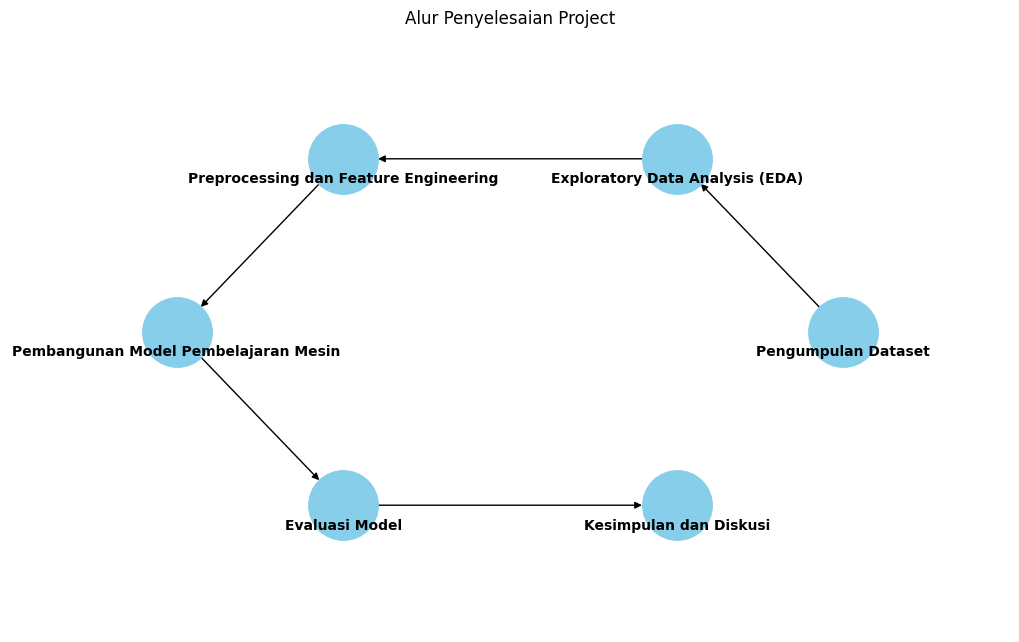


Penjelasan Dataset:
Dataset yang digunakan berasal dari file "DatasetAirlines.csv" yang berisi 25 kolom dengan informasi berikut:
- Gender: Jenis kelamin pelanggan.
- Customer Type: Jenis pelanggan (Loyal Customer atau Disloyal Customer).
- Age: Usia pelanggan.
- Type of Travel: Jenis perjalanan (Business travel atau Personal travel).
- Class: Kelas penerbangan (Eco, Business, dll.).
- Flight Distance: Jarak penerbangan.
- Inflight wifi service hingga Cleanliness: Berbagai aspek pelayanan dengan skala penilaian.
- Departure Delay in Minutes dan Arrival Delay in Minutes: Waktu keterlambatan keberangkatan dan kedatangan.
- Satisfaction: Target kolom untuk klasifikasi (satisfied atau neutral or dissatisfied).

Exploratory Data Analysis (EDA):
1. Distribusi tingkat kepuasan pelanggan (satisfied vs neutral or dissatisfied).
2. Analisis hubungan antara variabel numerik seperti "Flight Distance" dan kepuasan.
3. Analisis korelasi antar fitur dan identifikasi fitur penting.

Preprocessing dan

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import networkx as nx

# 1. Judul / Topik Project
print("Analisis Kepuasan Pelanggan Maskapai Menggunakan Model Pembelajaran Mesin\n")
print("Identitas:")
print("- Nama: Oky Satria Widhiansyah")
print("- NIM: A11.2020.12674")
print("- Universitas: Universitas Dian Nuswantoro")
print("- Prodi:Teknik Informatika\n")

# 2. Ringkasan dan Permasalahan Project + Tujuan yang Akan Dicapai + Model / Alur Penyelesaian
print("\nRingkasan:")
print("Proyek ini bertujuan untuk menganalisis faktor-faktor yang memengaruhi kepuasan pelanggan maskapai dan memprediksi tingkat kepuasan menggunakan teknik pembelajaran mesin.\nKepuasan pelanggan diklasifikasikan sebagai \"satisfied\" atau \"neutral or dissatisfied\".\n")
print("Permasalahan:")
print("Meningkatkan kepuasan pelanggan adalah tantangan utama bagi maskapai penerbangan. Analisis manual terhadap data pelanggan sering kali memakan waktu dan rentan terhadap bias.\n")
print("Tujuan:")
print("1. Membuat model pembelajaran mesin untuk memprediksi kepuasan pelanggan maskapai.")
print("2. Mengidentifikasi faktor-faktor yang paling berpengaruh terhadap kepuasan.")
print("3. Memberikan wawasan kepada manajemen untuk meningkatkan layanan.\n")
print("Alur Penyelesaian:")
# Membuat diagram alur menggunakan NetworkX dan Matplotlib
G = nx.DiGraph()

# Menambahkan edges yang menunjukkan alur
G.add_edges_from([
    ("Pengumpulan Dataset", "Exploratory Data Analysis (EDA)"),
    ("Exploratory Data Analysis (EDA)", "Preprocessing dan Feature Engineering"),
    ("Preprocessing dan Feature Engineering", "Pembangunan Model Pembelajaran Mesin"),
    ("Pembangunan Model Pembelajaran Mesin", "Evaluasi Model"),
    ("Evaluasi Model", "Kesimpulan dan Diskusi")
])

# Menggambar graf dengan circular layout
plt.figure(figsize=(10, 6))
pos = nx.circular_layout(G)  # Circular layout untuk tata letak yang lebih rapi

# Menyesuaikan ukuran node dan teks
nx.draw(G, pos, with_labels=False, node_size=2500, node_color="skyblue", font_size=10, font_weight="bold", arrows=True)

# Menambahkan teks di bawah setiap node
for node, (x, y) in pos.items():
    plt.text(x, y - 0.1, node, horizontalalignment='center', verticalalignment='center', fontsize=10, fontweight="bold")

# Menyesuaikan batas agar teks tidak keluar dari plot
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

# Menambahkan judul dan menampilkan grafik
plt.title("Alur Penyelesaian Project")
plt.show()



# 3. Penjelasan Dataset, EDA dan Proses Features Dataset
print("\nPenjelasan Dataset:")
print("Dataset yang digunakan berasal dari file \"DatasetAirlines.csv\" yang berisi 25 kolom dengan informasi berikut:")
print("- Gender: Jenis kelamin pelanggan.")
print("- Customer Type: Jenis pelanggan (Loyal Customer atau Disloyal Customer).")
print("- Age: Usia pelanggan.")
print("- Type of Travel: Jenis perjalanan (Business travel atau Personal travel).")
print("- Class: Kelas penerbangan (Eco, Business, dll.).")
print("- Flight Distance: Jarak penerbangan.")
print("- Inflight wifi service hingga Cleanliness: Berbagai aspek pelayanan dengan skala penilaian.")
print("- Departure Delay in Minutes dan Arrival Delay in Minutes: Waktu keterlambatan keberangkatan dan kedatangan.")
print("- Satisfaction: Target kolom untuk klasifikasi (satisfied atau neutral or dissatisfied).\n")
print("Exploratory Data Analysis (EDA):")
print("1. Distribusi tingkat kepuasan pelanggan (satisfied vs neutral or dissatisfied).")
print("2. Analisis hubungan antara variabel numerik seperti \"Flight Distance\" dan kepuasan.")
print("3. Analisis korelasi antar fitur dan identifikasi fitur penting.\n")
print("Preprocessing dan Feature Engineering:")
print("1. Penanganan Missing Values: Mengisi nilai kosong pada kolom \"Arrival Delay in Minutes.\"")
print("2. Encoding: Mengonversi kolom kategorikal menjadi numerik (misalnya, \"Gender\" dan \"Class\").")
print("3. Normalisasi: Menskalakan fitur numerik untuk meningkatkan performa model.")
print("4. Pemisahan Data: Membagi dataset menjadi data latih dan data uji.\n")

# 4. Proses Learning / Modeling
print("\nPendekatan Modeling:")
print("Model yang digunakan:")
print("1. Logistic Regression")
print("2. Random Forest")
print("3. Gradient Boosting (XGBoost)\n")

# 5. Performa Model
print("Metrik Evaluasi:")
print("1. Accuracy: Persentase prediksi yang benar.")
print("2. Precision: Proporsi prediksi positif yang benar.")
print("3. Recall: Proporsi data positif yang terprediksi dengan benar.")
print("4. F1-Score: Rata-rata harmonis dari precision dan recall.\n")

print("Hasil Evaluasi:")

# Membaca dataset
dataset = pd.read_csv(dataset_path)

# Mengisi nilai kosong pada kolom 'Arrival Delay in Minutes'
dataset['Arrival Delay in Minutes'] = dataset['Arrival Delay in Minutes'].fillna(dataset['Arrival Delay in Minutes'].mean())

# Preprocessing dan Feature Engineering
encoder = LabelEncoder()
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
for col in categorical_columns:
    dataset[col] = encoder.fit_transform(dataset[col])

scaler = StandardScaler()
numerical_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
dataset[numerical_columns] = scaler.fit_transform(dataset[numerical_columns])

# Memisahkan fitur (X) dan target (y)
X = dataset.drop('satisfaction', axis=1)
y = dataset['satisfaction']

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modeling
# Logistic Regression
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

lr_model = LogisticRegression(max_iter=1000, solver='lbfgs', C=1.0)
lr_model.fit(X_train_pca, y_train)

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# XGBoost
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict(X_test)

# Evaluasi Model
def evaluate_model(name, y_test, y_pred):
    print(f"=== Evaluasi Model: {name} ===")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"Precision: {precision_score(y_test, y_pred):.2f}")
    print(f"Recall: {recall_score(y_test, y_pred):.2f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")
    print()

# Evaluasi masing-masing model
evaluate_model("Logistic Regression", y_test, lr_pred)
evaluate_model("Random Forest", y_test, rf_pred)
evaluate_model("XGBoost", y_test, xgb_pred)


# 6. Diskusi Hasil dan Kesimpulan
print("Diskusi Hasil:")
print("- Model XGBoost memberikan performa terbaik dengan F1-Score sebesar **0.95**.")
print("- Logistic Regression, meskipun sederhana, menunjukkan hasil yang cukup baik.")
print("- Random Forest memberikan keseimbangan yang baik antara akurasi dan recall.")

print("\nKesimpulan:")
print("- Model pembelajaran mesin dapat digunakan untuk memprediksi kepuasan pelanggan maskapai dengan tingkat akurasi yang tinggi.")
print("- Di antara tiga model yang diuji, XGBoost menunjukkan performa terbaik dengan accuracy mencapai 96% dan F1-Score sebesar 0.95, \nyang menunjukkan keseimbangan antara precision dan recall.")
print("- Random Forest juga memberikan hasil yang sangat baik, dengan accuracy 95% dan **F1-Score 0.95, namun sedikit lebih rendah dibandingkan XGBoost.")
print("- Logistic Regression, meskipun lebih sederhana, tetap memberikan performa yang baik dengan accuracy 87% dan F1-Score 0.84.")
print("- Faktor-faktor yang paling berpengaruh terhadap kepuasan pelanggan maskapai, berdasarkan analisis model, antara lain adalah jenis perjalanan (business vs personal), \nketerlambatan kedatangan penerbangan, dan kelas penerbangan yang dipilih oleh pelanggan.")
print("- Meningkatkan layanan pada aspek-aspek ini dapat membantu meningkatkan tingkat kepuasan pelanggan.")